Prediction Model for Heart Disease in Males

In [2]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
set.seed(1)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/bak" 
heart_dataset = read_csv(url, col_names = FALSE) %>% 
    rename("age" = X1,
           "sex" = X2,
           "chest_pain" = X3,
           "ecg" = X7,
           "heart_disease_severity" = X14
    ) %>% 
    select(age, sex, chest_pain, ecg, heart_disease_severity)

heart_disease_split = initial_split(heart_dataset, prop = 0.75, strata = heart_disease_severity)
heart_disease_train = training(heart_disease_split) 
heart_disease_test = testing(heart_disease_split) 

heart_disease_train 
# training data will be 75% of the original dataset 
heart_disease_test 
# testing data will be 25% of the original dataset

# this dataset is already cleaned, no need for tidying: each row is an observation and each column is a variable. 
    # there are also no missing columns
# we choose to look at these four predictor variables, analyzing their relationship to heart disease severity - done below. 

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



age,sex,chest_pain,ecg,heart_disease_severity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,4,1,2
44,1,4,1,0
60,1,4,1,2
55,1,4,1,1
66,1,3,2,0
66,1,3,1,0
60,1,3,1,0
60,1,2,1,1
56,1,2,1,0


age,sex,chest_pain,ecg,heart_disease_severity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
65,1,4,1,3
60,1,3,0,3
57,1,4,1,1
63,1,4,0,4
60,1,4,1,0
74,1,3,0,0
51,1,4,1,2
56,1,4,0,1
77,1,4,1,3


`summarise()` regrouping output by 'sex' (override with `.groups` argument)



sex,heart_disease_severity,n
<dbl>,<dbl>,<int>
0,0,2
0,1,3
1,0,37
1,1,39
1,2,30
1,3,32
1,4,9


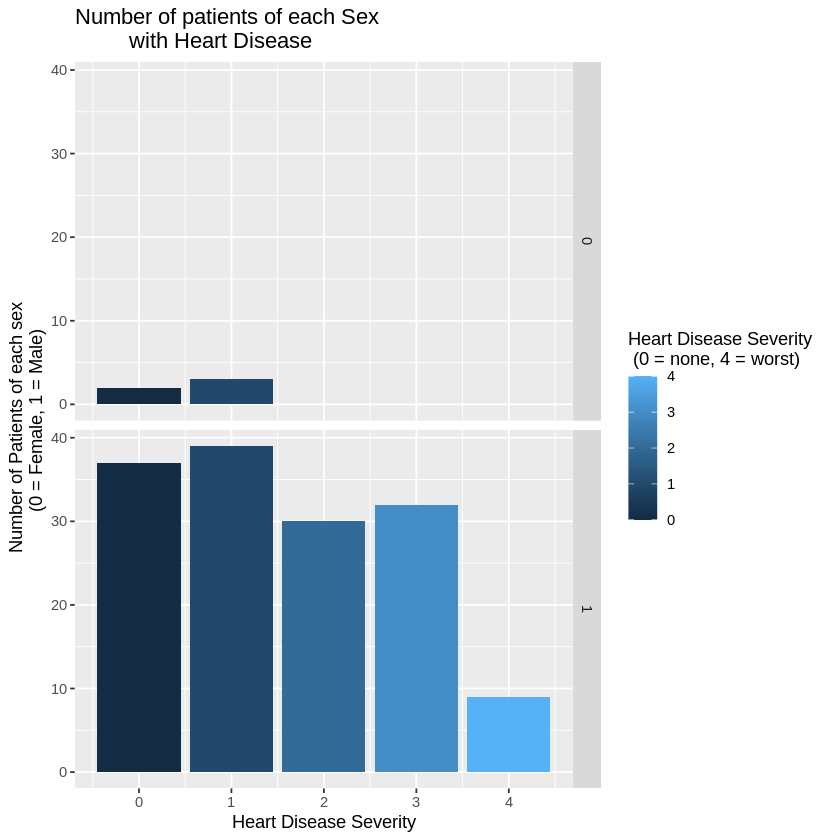

In [31]:
sex_tbl = heart_disease_train %>% 
    group_by(sex, heart_disease_severity) %>% 
    summarize (n = n()) 
sex_tbl  
# this table summarizes the distrbution of patients of a certain sex (0 = female, 1 = male) 
    # and how many of each fall into a heart disease category.

plot_sex = sex_tbl%>% 
    ggplot(aes(x = heart_disease_severity, y = n, fill = heart_disease_severity)) + 
        geom_bar(stat = "identity") + 
        facet_grid(sex ~ .) + 
        labs(x = "Heart Disease Severity", y = "Number of Patients of each sex \n  (0 = Female, 1 = Male)", fill = "Heart Disease Severity \n (0 = none, 4 = worst)") + 
        ggtitle ("Number of patients of each Sex \n         with Heart Disease")
plot_sex
# this visualization proves that the majority of our patients are males, giving us a larger sample size. 
    # thus it would be fitting that our data analysis is is centered around male patients.

`summarise()` regrouping output by 'chest_pain' (override with `.groups` argument)



chest_pain,heart_disease_severity,n
<dbl>,<dbl>,<int>
1,0,2
1,1,1
1,2,1
1,3,1
2,0,8
2,1,2
2,2,1
3,0,10
3,1,8


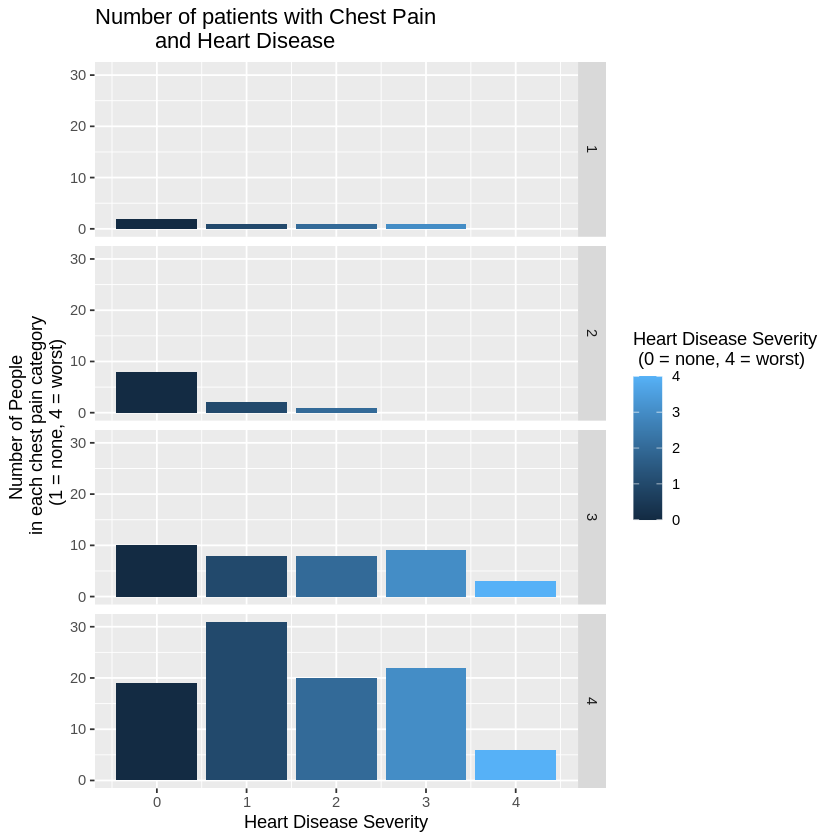

In [32]:
chest_pain_tbl = heart_disease_train %>% 
    group_by(chest_pain, heart_disease_severity) %>% 
    summarize (n = n()) 
chest_pain_tbl  
# this table summarizes the number of patients with severe chest pain (1 being the worst) 
    # and how many patients fall into each type of heart disease diagnosis in each category of chest pain

plot_chest_pain = chest_pain_tbl %>% 
    ggplot(aes(x = heart_disease_severity, y = n, fill = heart_disease_severity)) + 
        geom_bar(stat = "identity") + 
        facet_grid(chest_pain ~ .) + 
        labs (x = "Heart Disease Severity", y = "Number of People \n in each chest pain category \n (1 = none, 4 = worst)", fill = "Heart Disease Severity\n (0 = none, 4 = worst)") + 
        ggtitle ("Number of patients with Chest Pain \n          and Heart Disease ")
plot_chest_pain
# this visualization shows that patients with worse chest pain (bar plot #4) are more likely to have category 1-3 heart disease
    # this is in comparison to patients with none to milder chest pain (bar plots #1 to #3), who have less occurences of category 1-3 heart disease

`summarise()` regrouping output by 'ecg' (override with `.groups` argument)



ecg,heart_disease_severity,n
<dbl>,<dbl>,<int>
0,0,14
0,1,20
0,2,9
0,3,13
0,4,2
1,0,22
1,1,15
1,2,19
1,3,16


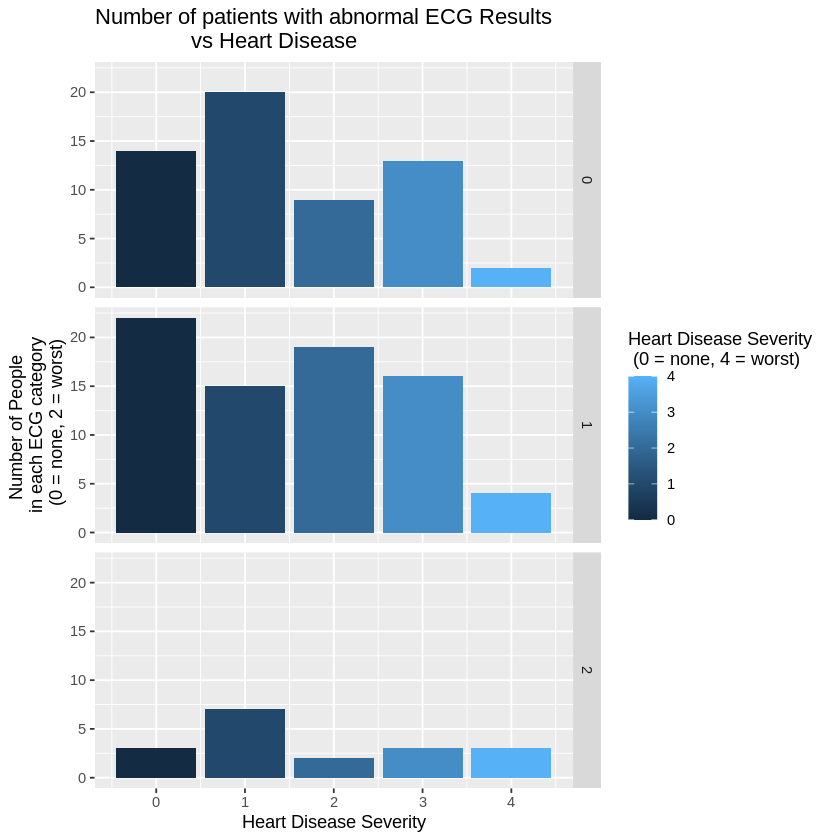

In [33]:
ecg_tbl = heart_disease_train %>% 
    group_by(ecg, heart_disease_severity) %>% 
    summarize (n = n()) 
ecg_tbl 
# this table summarizes the number of patients with abnormal ECG results (2 being the worst)
    # and how many patients fall into each type of heart disease diagnosis within each category of ECG abnormality

plot_ecg = ecg_tbl %>% 
    ggplot(aes(x = heart_disease_severity, y = n, fill = heart_disease_severity)) + 
        geom_bar(stat = "identity") + 
        facet_grid(ecg ~ .) + 
        labs (x = "Heart Disease Severity", y = "Number of People \n in each ECG category \n (0 = none, 2 = worst)", fill = "Heart Disease Severity \n (0 = none, 4 = worst)") + 
        ggtitle ("Number of patients with abnormal ECG Results \n                vs Heart Disease ")
plot_ecg
# This shows there isn't a strong correlation between abnormal ECG results and heart disease
# however, we see that patients with ST-T wave abnormality (bar plot #1) have a higher chance of category 2 heart disease (more severe), 
    # compared to patients with no ECG abnormality (bar plot #0) have higher chance of category 1 heart disease (less severe)
# therefore, we see a positive correlation between ECG abnormality and more severe heart disease

`summarise()` regrouping output by 'age' (override with `.groups` argument)



age,heart_disease_severity,n
<dbl>,<dbl>,<int>
35,0,1
38,1,1
40,0,1
40,1,1
41,0,2
43,1,1
44,0,1
45,0,1
46,1,1


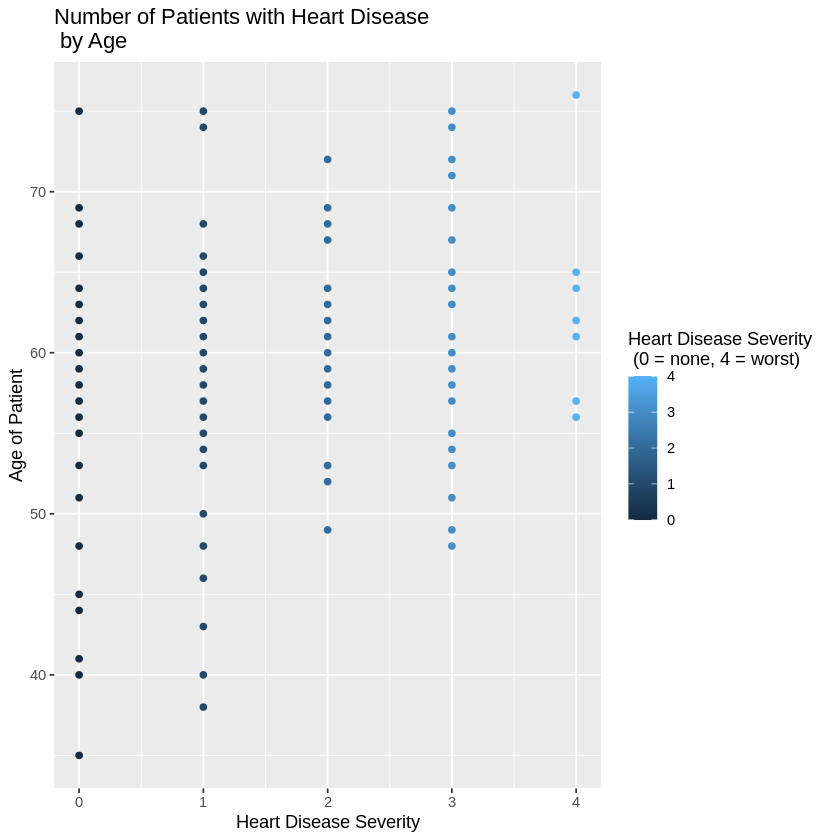

In [34]:
age_tbl = heart_disease_train %>% 
    group_by(age, heart_disease_severity) %>% 
    summarize (n = n()) 
age_tbl  
# this table summarizes the distrbution of patient age 
    # and how many of each fall into a specific heart disease severity category.

plot_age = age_tbl%>% 
    ggplot(aes(x = heart_disease_severity, y = age, color = heart_disease_severity)) + 
        geom_point() + 
        labs(x = "Heart Disease Severity", y = "Age of Patient", color = "Heart Disease Severity \n (0 = none, 4 = worst)") + 
        ggtitle ("Number of Patients with Heart Disease \n by Age") 
plot_age
# this visualization proves that with a greater heart disease severity, the age group of patients tends to be older.
#therefore, there is a weak positive correlation between heart diseases severity and age.

! Fold02: internal: No observations were detected in `truth` for level(s): '4'
Com...

! Fold04: internal: No observations were detected in `truth` for level(s): '4'
Com...

! Fold05: internal: No observations were detected in `truth` for level(s): '4'
Com...

! Fold06: internal: No observations were detected in `truth` for level(s): '4'
Com...

! Fold07: internal: No observations were detected in `truth` for level(s): '4'
Com...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.3083398,10,0.04526855,Model01
2,accuracy,multiclass,0.3411897,10,0.04438403,Model02
3,accuracy,multiclass,0.2944955,10,0.04228504,Model03
4,accuracy,multiclass,0.2752203,10,0.03861348,Model04
5,accuracy,multiclass,0.2831475,10,0.04197150,Model05
6,accuracy,multiclass,0.2814703,10,0.04353623,Model06
7,accuracy,multiclass,0.2626608,10,0.03777202,Model07
8,accuracy,multiclass,0.2367189,10,0.03468872,Model08
9,accuracy,multiclass,0.2413408,10,0.03534258,Model09


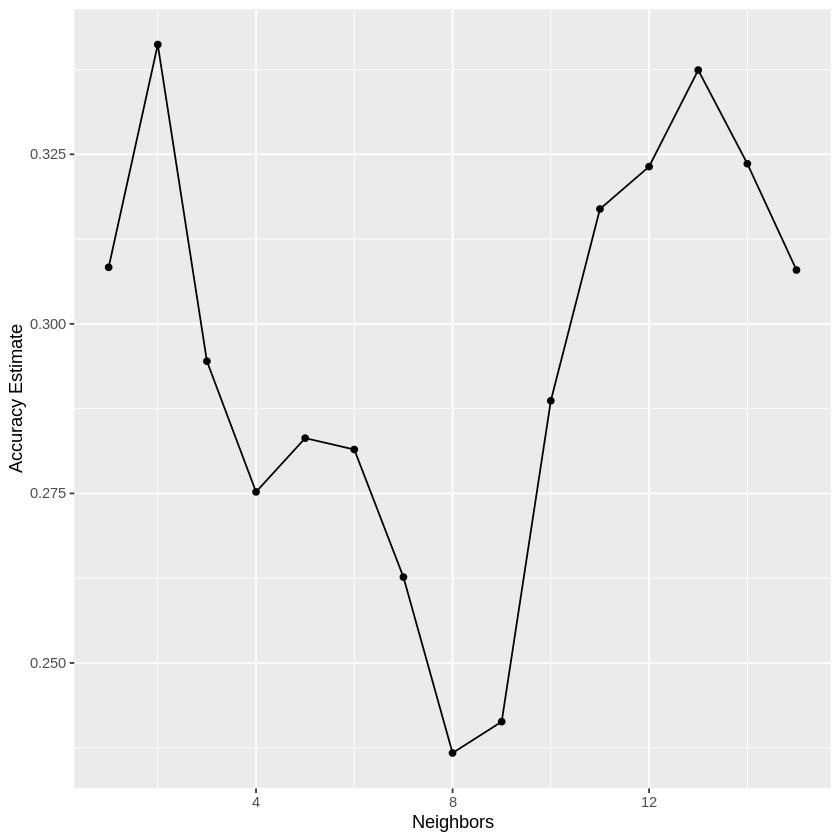

In [39]:
# set the seed 
set.seed (1)

# make a specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification") 

# filter our pre-existing dataset to contain data on JUST males. 
heart_data = heart_dataset %>% 
    filter(sex == "1") %>% 
    mutate(heart_disease_severity = as_factor(heart_disease_severity))

# split this dataset, again, into testing and training data. 
heart_split = initial_split(heart_data, prop = 0.75, strata = heart_disease_severity)
heart_train = training(heart_split) 
heart_test = testing(heart_split)

# make a recipe
heart_recipe <- recipe(heart_disease_severity ~ ecg + age + chest_pain, data = heart_train) %>% 
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

# specify folds 
heart_vfold = vfold_cv(heart_train, v = 10, strata = heart_disease_severity) 

#specify grid argument 
k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

# make a workflow, run training data, collect the metrics 
heart_fit <- workflow() %>%
       add_recipe(heart_recipe) %>% 
       add_model(knn_tune) %>%
       tune_grid(resamples = heart_vfold, grid = k_vals) %>% 
        collect_metrics() %>% 
        filter(.metric == "accuracy")
heart_fit

# plot the accuracy vs K 
accuracy_versus_k <- heart_fit %>%
    ggplot(aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate")
accuracy_versus_k

this shows us that with our current dataset, the accuracy of classification is very low, maximum about 36%. This can be due to third party variables. In the original dataset and in exploratory data analysis, we can see there IS correlation between our factors (ecg results, age, and chest pain in males) and the presence of heart disease (categories of 0 (without HD) compared to 1-4 (with HD)), but LITTLE correlation between these factors and the *category* of heart disease (categories 1, 2, 3, or 4 of HD). This can be due to confound or third party variables we aren't considering in the dataset, such as the socioecnomic background of the individuals int he dataset, and relative affordability of healthcare, etc. 

Perhaps it would be helpful to group all instances of "yes" heart disease as 1, keep "no" heart disease as 0, and only have these two outcomes as the explanatory variables. This can help return a higher classifier accuracy value. We do this below: 

In [40]:
# make all 1-4 values = 0 
heart_data$heart_disease_severity[heart_data$heart_disease_severity == 1 | 
                                 heart_data$heart_disease_severity == 2 |
                                 heart_data$heart_disease_severity == 3 | 
                                 heart_data$heart_disease_severity == 4] = 1
heart_data_edited <- heart_data %>% select(-sex)

! Fold01: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold02: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold03: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold04: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold05: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold06: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold07: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold08: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold09: internal: No observations were detected in `truth` for level(s): '2', '3...

! Fold10: internal: No observations were detected in `truth` for level(s): '2', '3...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7057143,10,0.03617376,Model01
2,accuracy,multiclass,0.6928571,10,0.03425962,Model02
3,accuracy,multiclass,0.7547619,10,0.02139327,Model03
4,accuracy,multiclass,0.7414286,10,0.02671245,Model04
5,accuracy,multiclass,0.7338095,10,0.02015873,Model05
6,accuracy,multiclass,0.7271429,10,0.02345826,Model06
7,accuracy,multiclass,0.7404762,10,0.02732050,Model07
8,accuracy,multiclass,0.7404762,10,0.02732050,Model08
9,accuracy,multiclass,0.7547619,10,0.02945075,Model09


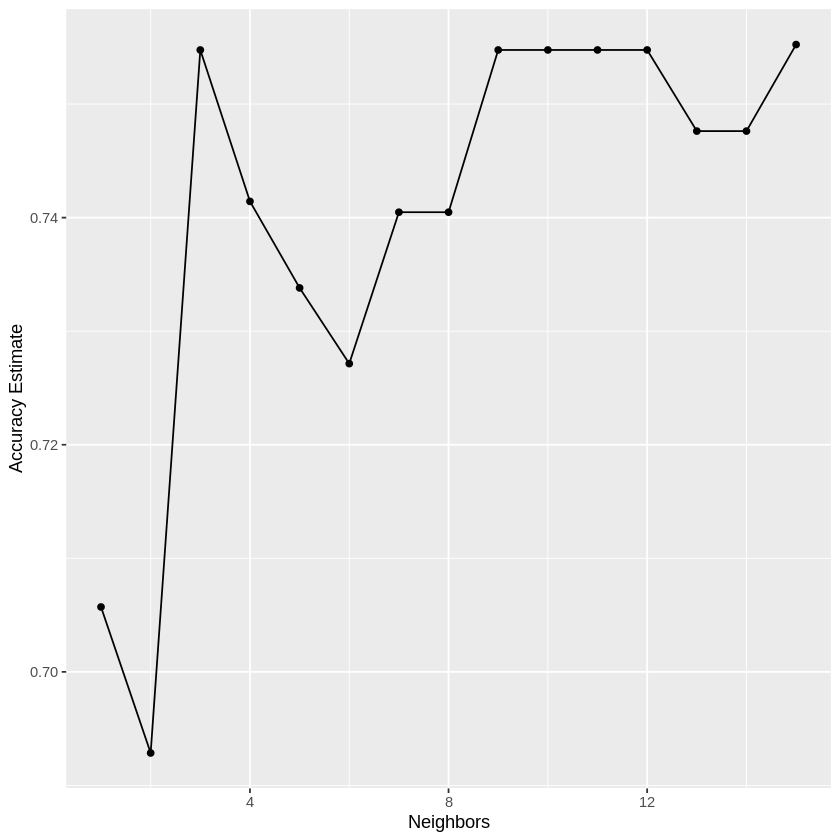

In [41]:
#now, run the exact same code to generate a % accuracy vs K graph to find the best K value, using our heart_dataset_edited data. 


# split this dataset, again, into testing and training data. 
heart_split_edited = initial_split(heart_data_edited, prop = 0.75, strata = heart_disease_severity)
heart_train_edited = training(heart_split_edited) 
heart_test_edited = testing(heart_split_edited)

# make a recipe
heart_recipe_edited <- recipe(heart_disease_severity ~ ecg + age + chest_pain, data = heart_train_edited) %>% 
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

# specify folds 
heart_vfold_edited = vfold_cv(heart_train_edited, v = 10, strata = heart_disease_severity) 

# make a workflow, run training data, collect the metrics 
heart_fit_edited <- workflow() %>%
       add_recipe(heart_recipe_edited) %>% 
       add_model(knn_tune) %>%
       tune_grid(resamples = heart_vfold_edited, grid = k_vals) %>% 
        collect_metrics() %>% 
        filter(.metric == "accuracy")
heart_fit_edited

# plot the accuracy vs K 
accuracy_versus_k_edited <- heart_fit_edited %>%
    ggplot(aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate")
accuracy_versus_k_edited 

from this, we see that K = 10 is the best K to use on testing data. 

In [48]:
# accuracy at K = 10 on training data
heart_fit_edited %>% 
    filter(neighbors == "10") %>% 
    pull(mean)

[1] 0.7547619

In [55]:
# run classifier on testing data 
test_spec = nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>% 
    set_engine("kknn") %>% 
    set_mode("classification") 

test_fit = workflow() %>%
    add_recipe(heart_recipe_edited) %>% 
    add_model(test_spec) %>% 
    fit(data = heart_train_edited)

test_accuracy = test_fit %>% 
    predict(heart_test_edited) %>% 
    bind_cols(heart_test_edited) %>% 
    metrics(truth = heart_disease_severity, estimate = .pred_class) %>% 
    filter(.metric == "accuracy")
test_accuracy

# find accuracy of K = 10 on testing data
test_accuracy %>% 
    pull(.estimate)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7083333


[1] 0.7083333

From this, we see our classifier with K = 10 gives us an approx. 71% accuracy when ran on our testing data, not too far off from our training data. 

In [58]:
# run classifier on a hypothetical patient model, proving our thesis: that a worse ecg result, worse heart pain, 
    # and a higher age would result in a likely diagnosis of heart disease.

poor_patient = tibble(chest_pain = 4, ecg = 2, age = 80) 

test_accuracy_poor = test_fit %>% 
    predict(poor_patient)
test_accuracy_poor



healthy_patient = tibble(chest_pain = 1, ecg = 0, age = 50)

test_accuracy_good = test_fit %>% 
    predict(healthy_patient)
test_accuracy_good

.pred_class
<fct>
1


.pred_class
<fct>
0


in summary, our results show that our thesis is proven. the poor patient with severe chest pain, poor ecg results, a high age is diagnosed with a "1" indicating they ARE likely to have heart disease, whereas the healthy patient with less severe chest pain, good ecg results, and a lower age is diagnosed with a "0" indicating they are likely NOT to have heart disease.

Prediction Model for Heart Disease in Males: Report

Introduction:
According to the World Health Organization, heart diseases are the leading cause of death worldwide, and make up 17.9 million deaths each year, 32% of all deaths globally (“Cardiovascular Diseases”). In Canada, about 1 in 12 adults aged 20 and over are diagnosed with heart disease (Public Health Agency of Canada). It is therefore essential to study the causes and consequences of cardiovascular diseases to better understand these numbers and hopefully reduce them. An unhealthy diet, tobacco and alcohol use, obesity, as well as a lack of physical activity are the most important behavioral risk factors leading to heart disease (“Cardiovascular Diseases”). These risk factors, along with age, electrocardiogram results, and chest pain will influence a patient’s cardiovascular prognosis. It is important to diagnose heart disease early on in order to commence treatment plans and prevent more severe illnesses. It has also been found that men are twice as likely to suffer a heart attack than women (Public Health Agency of Canada). Therefore, this classification aims to predict whether a male patient is at risk of heart disease based on their age, type of chest pain, and resting electrocardiogram results. It is hypothesized that the impacts of these aforementioned trends on heart disease diagnosis will be shown when analyzing the health data of new patients. The University of California’s Heart Disease Dataset has been sourced from mostly older male patients and measures several health variables and corresponding heart disease diagnosis, ranging from none to high chances of heart disease, on a scale from 0 to 4. This dataset will be used to create a classification model to make new diagnosis. 

Methods and Results: 
For the packages, we used the tidyverse and tidymodels packages which allowed us to carry out the data wrangling and analysis steps in our classification. The first step of the project was reading and loading the data. We used the read_csv function to read the data into jupyter as the data is separated by commas. We also assigned column names to each column as there were no names in the original data. We then selected the columns that we are going to use in our analysis which included the predictor variables of age, sex, chest pain, and ecg, and the target variable of heart disease severity.
An important step to data analysis is tidying data to ensure that you are able to understand and effectively analyze the data. Upon observation, tidying was not necessary as each row represented one observation, each column contained one variable, and each cell had one value.

Next, we split the data into a training and a test set. For this, we used an initial split which helped to shuffle and stratify the data, ensuring that the order of the data will not affect our analysis and that the proportions for each category of target variables will be the same in both the training and the testing set. We assigned 75% of the data into the training set and 25% in the testing set by setting the prop argument to 0.75. We put 75% of the data into the training set in order to maximize the amount of data in both our training set and our testing set. This allows for a balance between having a large amount of data in our training set but also a large enough proportion of data in our testing set to maximize the training of the classifier and to ensure that there is enough data in the testing set to get an accurate representation of our classifier’s accuracy. 

We then created exploratory visualizations which allowed us to see potential relationships between the predictors and our target variables. For each visualization, we carried out the same process. First, we grouped by each of the two variables used in the visualization, allowing us to summarize and count the number of people in each category. For example, in our first visualization, we grouped by sex and heart disease severity and were able to count the number of people in the sex cateogry and the number of people that had each level of heart disease severity. The bar plot generated was then used to explore the relationships between sex, one of our predictor variables, and heart disease severity, our target variable. Each of our predictors were plotted against heart disease severity using bar/scatter plots to examine the possible relationships between the variables at hand. Furthermore, we used bar plots because our variables involved categorical variables, where relationships could be seen through the counts of each variable compared to the other. 

After creating our visualizations, the next step was to train our classifier. For this we use the training data so that when we test the accuracy of our classifier on the testing set, there is no bias towards the predictions as the classifier has not yet been exposed to the testing set. To build our classifier, we built our model specification by setting the engine to “kknn” and set the mode to “classification”. We also chose to tune the classifier as we are going to test a range of k values from 1 to 50 using a 10 fold cross validation. Having 10 folds will give us a more accurate average across all the folds compared to using a lower amount of folds. This will ultimately give us a more accurate representation of which k will give the highest accuracy. We also chose a maximum of 10 folds due to our limitations in computational power. Before any training started, we set the seed to 1 to ensure that our analysis will be reproducible. Additionally, when building our recipe, we scaled and centered the data in order to ensure that the influence of each variable on our prediction will be equal. 

When testing k values from 1-50, our classifier returned very low accuracies for each value with a maximum accuracy of ~36%. To improve the accuracy of our classifier, we decided a “yes” or “no” approach may return a higher accuracy. We combined the heart disease severity of 1-4 into just 1, meaning that the patient has heart disease, while keeping the value of 0 as not having heart disease. After training the classifier with this modified predictor variable, a line plot was generated illustrating the accuracy vs K. We can see that the accuracy is the highest when K = 10 and is around 75-76%, and thus, we will choose this k because when we have a slight increase or decrease in the k value, the accuracy does not decrease significantly. Moreover, we displayed only Ks from 1-15 in our plot of accuracy vs K, because any K above 15 would return relatively equal accuracy values, without any significant increase or decrease in classifier accuracy. Thus, we chose to test a smaller range of Ks so it would be easier to visualize on the X-axis which K-value to choose. Lastly, if we used too large a range of Ks, the output would be redundant since we don’t want to underfit our training set. 
Once choosing k = 10, we then rebuilt our specification using this K value, which we then used to make a prediction on the testing data set. Our testing set prediction gave us approximately 71% accuracy which was similar to our training data’s accuracy at K = 10, illustrating that our classifier’s accuracy in predicting new observations was similar to that of the accuracy obtained from the training set. 

Lastly, we ran the classifier on a hypothetical patient model to prove our thesis that patients with worse ecg result, worse heart pain, and a higher age would result in a likely diagnosis of heart disease. We used both an at-risk patient with a high chest pain value of 4, an ecg of 2, and a high age of 80 years old, and a healthy patient with a low chest pain of 1, a low ecg of 0, and a lower age of 50 years old. For the at-risk patient, the classifier predicted a heart disease severity of 1, meaning that the patient was expected to experience heart disease. For the healthy patient, the predicted heart disease value was 0 which meant that they were not expected to experience heart disease. 

Discussion:
Upon initial analysis of the dataset, it was found that age, sex, chest pain severity, and electrocardiogram results all have a positive relationship with heart disease severity. For this reason, these observations were used as predictors in the classification model. Our first model resulted in a very low % accuracy, with a maximum of 36%. It was hypothesized that these results could be due to third party factors, such as socioeconomic background and relative affordability of healthcare that weren’t taken into account as variables. In order to increase the accuracy of our model, the observations of heart disease severity were changed to be either 1 or 0, indicating that the patient either has or does not have heart disease. With this modification, our new model turned out an accuracy of about 71% when using K = 10. We then used this classifier to confirm our thesis; an older male patient with chest pain and poor electrocardiogram results is likely to have heart disease, whereas a younger male patient with less severe chest pain and good electrocardiogram results is not likely to have heart disease. 

The impact of these findings from our classifier may be used to predict the likelihood of developing heart disease for patients that have not yet received a professional physician’s diagnosis. Of course, this classifier’s accuracy would have to be much improved (e.g. considering more variables/factors) in order to put this type of prognosis tool into practice, but it is a good start to examine how classifiers can impact the healthcare field and workers. 
In the future, our findings can drive further research on preventative measures against heart disease by considering our explanatory variables discussed in this report. For example, physicians can use this type of analysis to explore the causes of heart disease in order to develop more specialized treatment plans and prescribe the right medication. Moreover, these findings pose new questions to explore such as what types of third-party variables affect heart diseases and whether other demographics of patients would have the same factors affecting the likelihood of heart disease. 

References:
“Cardiovascular Diseases.” World Health Organization, World Health Organization, https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1. 
Public Health Agency of Canada. “Heart Disease in Canada.” Government of Canada, 10 Feb. 2017, https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html. 
“Heart Disease Data Set.” UCI Machine Learning Repository, University of California, Irvine, School of Information and Computer Sciences, 2019, https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 